In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Subsample 200 images from the dataset 
Subsample 200 images by selecting 20 images from each of the top 10 categories to optimize computational efficiency and reduce evaluation time.



In [2]:
df_images = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv")
df_images

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...
...,...,...
44441,17036.jpg,http://assets.myntassets.com/v1/images/style/p...
44442,6461.jpg,http://assets.myntassets.com/v1/images/style/p...
44443,18842.jpg,http://assets.myntassets.com/v1/images/style/p...
44444,46694.jpg,http://assets.myntassets.com/v1/images/style/p...


In [4]:
df_images = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines="warn")
df_images

Skipping line 6044: expected 10 fields, saw 11
Skipping line 6569: expected 10 fields, saw 11
Skipping line 7399: expected 10 fields, saw 11
Skipping line 7939: expected 10 fields, saw 11
Skipping line 9026: expected 10 fields, saw 11
Skipping line 10264: expected 10 fields, saw 11
Skipping line 10427: expected 10 fields, saw 11
Skipping line 10905: expected 10 fields, saw 11
Skipping line 11373: expected 10 fields, saw 11
Skipping line 11945: expected 10 fields, saw 11
Skipping line 14112: expected 10 fields, saw 11
Skipping line 14532: expected 10 fields, saw 11
Skipping line 15076: expected 10 fields, saw 12
Skipping line 29906: expected 10 fields, saw 11
Skipping line 31625: expected 10 fields, saw 11
Skipping line 33020: expected 10 fields, saw 11
Skipping line 35748: expected 10 fields, saw 11
Skipping line 35962: expected 10 fields, saw 11
Skipping line 37770: expected 10 fields, saw 11
Skipping line 38105: expected 10 fields, saw 11
Skipping line 38275: expected 10 fields, saw 

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [5]:
df_images = df_images[["id", "gender", "subCategory", "articleType"]]
df_images

,id,gender,subCategory,articleType
0,15970,Men,Topwear,Shirts
1,39386,Men,Bottomwear,Jeans
2,59263,Women,Watches,Watches
3,21379,Men,Bottomwear,Track Pants
4,53759,Men,Topwear,Tshirts
...,...,...,...,...
44419,17036,Men,Shoes,Casual Shoes
44420,6461,Men,Flip Flops,Flip Flops
44421,18842,Men,Topwear,Tshirts
44422,46694,Women,Fragrance,Perfume and Body Mist


In [8]:
df_images["articleType"].value_counts()

articleType
Tshirts                7067
Shirts                 3217
Casual Shoes           2845
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: count, Length: 143, dtype: int64

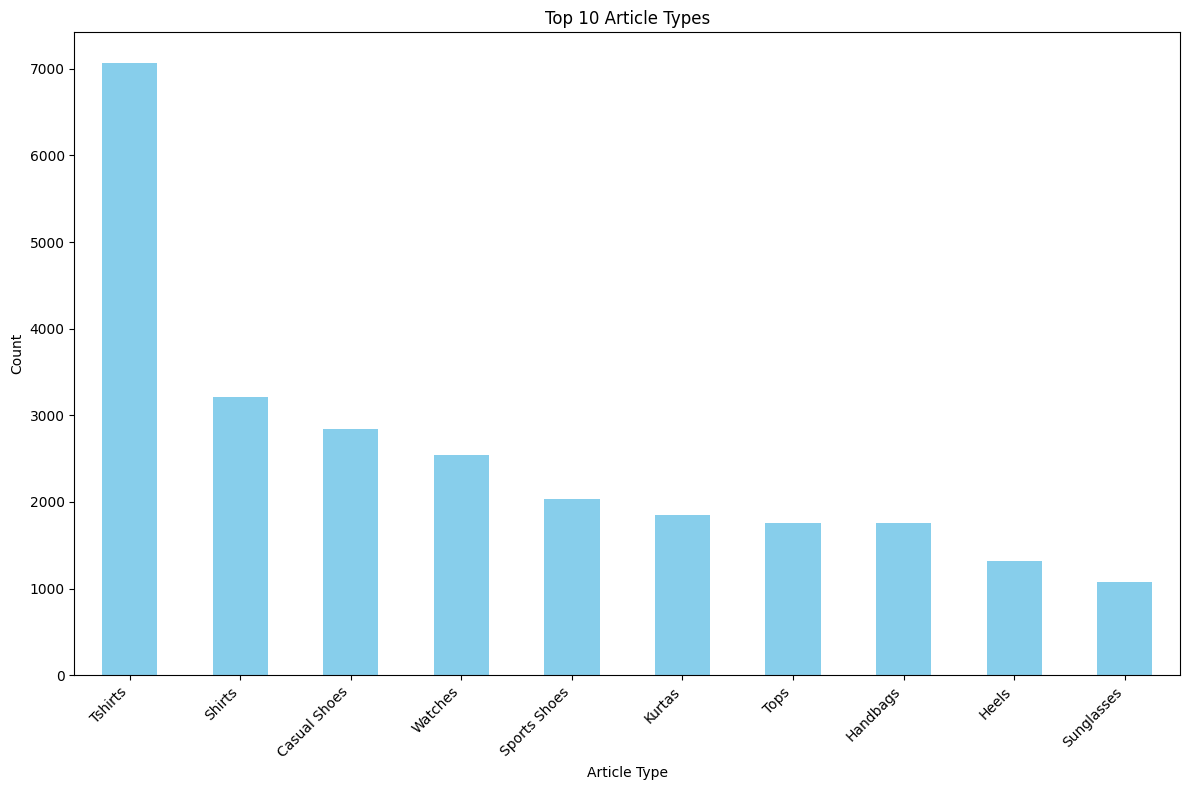

In [12]:
import matplotlib.pyplot as plt

# Assuming df_images is your DataFrame
top_categories = df_images["articleType"].value_counts().nlargest(10)

# Plotting the histogram for the top 10 categories
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Article Types')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [31]:
test = pd.DataFrame(top_categories).reset_index()

In [35]:
article_types = test["articleType"].to_list()
article_types.remove("Tops")
article_types.append("Flip Flops")
article_types

['Tshirts',
 'Shirts',
 'Casual Shoes',
 'Watches',
 'Sports Shoes',
 'Kurtas',
 'Handbags',
 'Heels',
 'Sunglasses',
 'Flip Flops']

In [37]:
len(article_types)

10

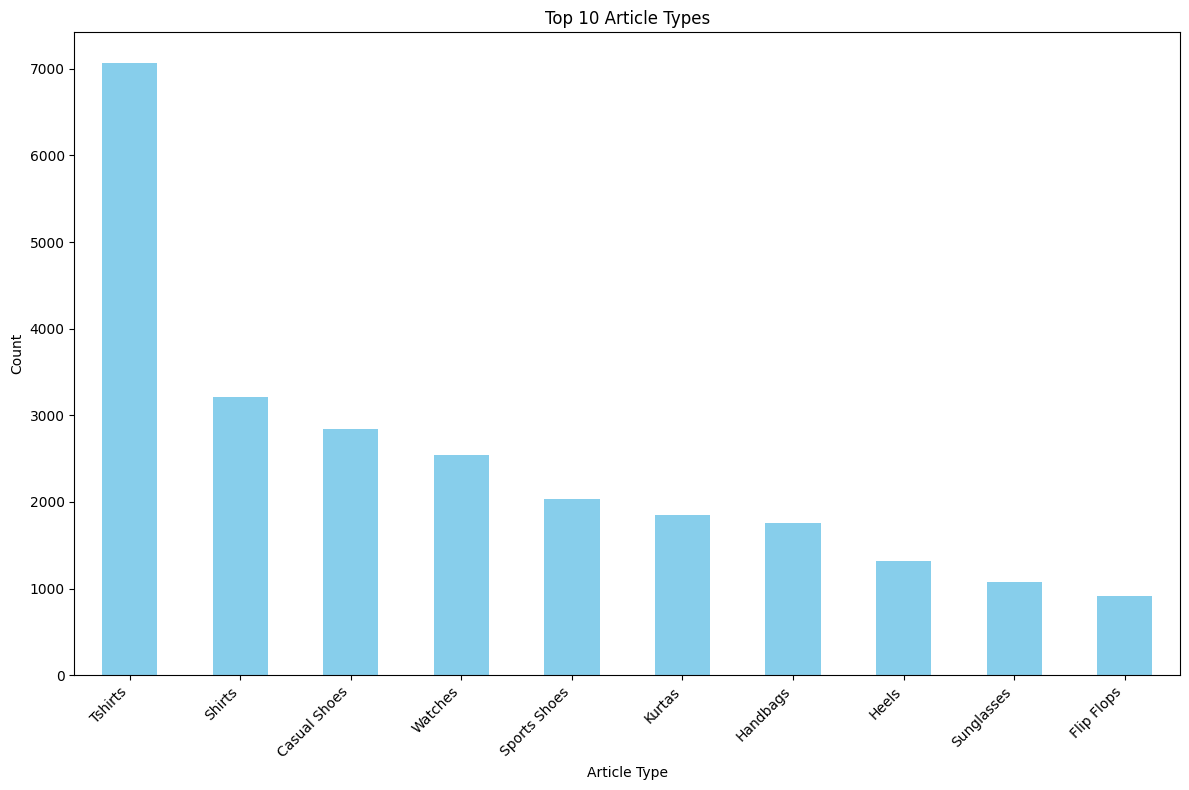

In [36]:
import matplotlib.pyplot as plt

# Assuming df_images is your DataFrame
top_categories = df_images[df_images["articleType"].isin(article_types)]["articleType"].value_counts()

# Plotting the histogram for the top 10 categories
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Article Types')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Tops


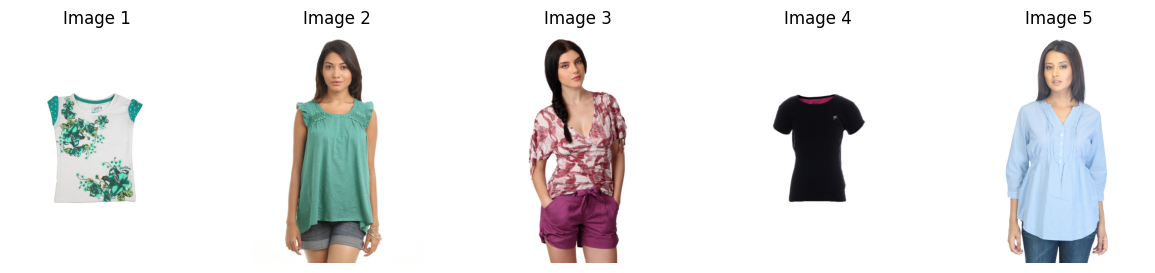

In [28]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_n_imgs_for_class(classname, N_imgs=10):
    class_images = df_images[df_images['articleType'] == classname].head(N_imgs)

    print(classname)
    image_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"
    
    # Create a subplot with a grid layout
    fig, axs = plt.subplots(1, N_imgs, figsize=(15, 3))

    for i, (index, row) in enumerate(class_images.iterrows()):
        img_path = os.path.join(image_dir, str(row["id"]) + ".jpg")
        
        # Load and display the image
        img = mpimg.imread(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')  # Turn off axis labels
        axs[i].set_title(f"Image {i+1}")

    plt.show()

# Example usage:
show_n_imgs_for_class('Tops', N_imgs=5)

In [39]:
import os
import pandas as pd

def retrieve_img_paths_per_category(df_images, category_list, N_imgs_per_category=20):
    image_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"
    result_df = pd.DataFrame(columns=df_images.columns)
    
    for category in category_list:
        cat_df = df_images[df_images['articleType'] == category].head(N_imgs_per_category)
        result_df = pd.concat([result_df, cat_df])

    return result_df


result_dataframe = retrieve_img_paths_per_category(df_images, article_types, N_imgs_per_category=20)
result_dataframe

,id,gender,subCategory,articleType
4,53759,Men,Topwear,Tshirts
5,1855,Men,Topwear,Tshirts
27,7990,Men,Topwear,Tshirts
31,4729,Boys,Topwear,Tshirts
39,3954,Women,Topwear,Tshirts
...,...,...,...,...
493,3998,Men,Flip Flops,Flip Flops
549,44722,Women,Flip Flops,Flip Flops
561,21187,Men,Flip Flops,Flip Flops
587,35573,Men,Flip Flops,Flip Flops


In [44]:
result_dataframe["articleType"].value_counts()

articleType
Tshirts         20
Shirts          20
Casual Shoes    20
Watches         20
Sports Shoes    20
Kurtas          20
Handbags        20
Heels           20
Sunglasses      20
Flip Flops      20
Name: count, dtype: int64

In [47]:
image_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/images"
result_dataframe["path"] = result_dataframe["id"].apply(lambda x: f"{image_dir}/{x}.jpg")

In [49]:
result_dataframe

,id,gender,subCategory,articleType,path
4,53759,Men,Topwear,Tshirts,/kaggle/input/fashion-product-images-dataset/f...
5,1855,Men,Topwear,Tshirts,/kaggle/input/fashion-product-images-dataset/f...
27,7990,Men,Topwear,Tshirts,/kaggle/input/fashion-product-images-dataset/f...
31,4729,Boys,Topwear,Tshirts,/kaggle/input/fashion-product-images-dataset/f...
39,3954,Women,Topwear,Tshirts,/kaggle/input/fashion-product-images-dataset/f...
...,...,...,...,...,...
493,3998,Men,Flip Flops,Flip Flops,/kaggle/input/fashion-product-images-dataset/f...
549,44722,Women,Flip Flops,Flip Flops,/kaggle/input/fashion-product-images-dataset/f...
561,21187,Men,Flip Flops,Flip Flops,/kaggle/input/fashion-product-images-dataset/f...
587,35573,Men,Flip Flops,Flip Flops,/kaggle/input/fashion-product-images-dataset/f...


In [ ]:
from PIL import Image
import os
import zipfile
import pandas as pd

def resize_and_save_to_zip(input_dataframe, zip_filename, target_width=300):
    # Create a temporary directory to store resized images
    temp_dir = "/kaggle/working/temp_images3"
    os.makedirs(temp_dir, exist_ok=True)

    # Resize and save images
    for index, row in input_dataframe.iterrows():
        img = Image.open(row["path"])
        width_percent = (target_width / float(img.size[0]))
        target_height = int((float(img.size[1]) * float(width_percent)))
        resized_img = img.resize((target_width, target_height), Image.LANCZOS)

        # Save resized image to the temporary directory
        resized_path = os.path.join(temp_dir, f"{row['id']}.jpg")
        resized_img.save(resized_path)

    # Save the DataFrame to CSV in the temporary directory
    csv_filename = os.path.join(temp_dir, "result_dataframe.csv")
    input_dataframe.to_csv(csv_filename, index=False)

    # Create a zip file and add resized images and CSV file
    with zipfile.ZipFile(zip_filename, 'w') as zip_file:
        for root, _, files in os.walk(temp_dir):
            for file in files:
                file_path = os.path.join(root, file)
                zip_file.write(file_path, os.path.relpath(file_path, temp_dir))

# Example usage:
# Assuming you have the "result_dataframe" with the "path" and "id" columns
zip_filename = "/kaggle/working/resized_images_and_csv3.zip"
resize_and_save_to_zip(result_dataframe, zip_filename, target_width=300)

print(f"Resized images and CSV file saved to {zip_filename}")